In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dcmam17","key":"9223c5ed0897720ab5c63ade1ddb9ab7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

100% 160M/161M [00:00<00:00, 168MB/s]
100% 161M/161M [00:00<00:00, 184MB/s]


In [ ]:
!mkdir corns
!unzip -qq corn-or-maize-leaf-disease-dataset.zip -d corns
!ls corns

data


In [ ]:
!ls corns/data

Blight	Common_Rust  Gray_Leaf_Spot  Healthy


In [ ]:
import os

corns = os.path.join('/content/corns/data')

print(os.listdir(corns))

['Gray_Leaf_Spot', 'Blight', 'Common_Rust', 'Healthy']


In [ ]:
import shutil

corns_list = os.listdir(corns)
print(corns_list)

['Gray_Leaf_Spot', 'Blight', 'Common_Rust', 'Healthy']


In [ ]:
from PIL import Image
total = 0

for x in corns_list:
  dir = os.path.join(corns, x)
  y = len(os.listdir(dir))
  print(x + ': ', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-', img.size)
  print('\n')

print('\nTotal :', total)

Gray_Leaf_Spot:  574
- (256, 256)
- (256, 256)
- (256, 256)
- (525, 395)


Blight:  1146
- (256, 256)
- (256, 256)
- (256, 256)
- (256, 256)


Common_Rust:  1306
- (256, 256)
- (256, 256)
- (256, 256)
- (256, 256)


Healthy:  1162
- (256, 256)
- (256, 256)
- (256, 256)
- (256, 256)



Total : 4188


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2,
    width_shift_range=0.2,
    horizontal_flip=True,
    height_shift_range=0.2
)

In [ ]:
data_train = train_datagen.flow_from_directory(
    corns,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    corns, 
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),  
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\nAccuracy melebihi 0.85!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
hist = model.fit(data_train, 
                    epochs = 40, 
                    validation_data = data_val, 
                    verbose = 1,
                    callbacks = [callbacks]
)

Epoch 1/40
419/419 [==============================] - 186s 441ms/step - loss: 0.6212 - accuracy: 0.7530 - val_loss: 0.4337 - val_accuracy: 0.8014
Epoch 2/40
419/419 [==============================] - 182s 435ms/step - loss: 0.4789 - accuracy: 0.7995 - val_loss: 0.3596 - val_accuracy: 0.8301
Epoch 3/40
419/419 [==============================] - 182s 433ms/step - loss: 0.4535 - accuracy: 0.8070 - val_loss: 0.3497 - val_accuracy: 0.8349
Epoch 4/40
419/419 [==============================] - 181s 433ms/step - loss: 0.4069 - accuracy: 0.8234 - val_loss: 0.3645 - val_accuracy: 0.8218
Epoch 5/40
419/419 [==============================] - 181s 431ms/step - loss: 0.3775 - accuracy: 0.8297 - val_loss: 0.3245 - val_accuracy: 0.8361
Epoch 6/40
419/419 [==============================] - 181s 432ms/step - loss: 0.3655 - accuracy: 0.8392 - val_loss: 0.3299 - val_accuracy: 0.8289
Epoch 7/40
419/419 [==============================] - 180s 430ms/step - loss: 0.4050 - accuracy: 0.8300 - val_loss: 0.3068 -

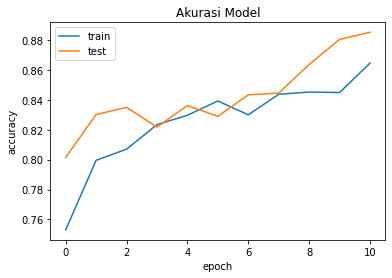

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

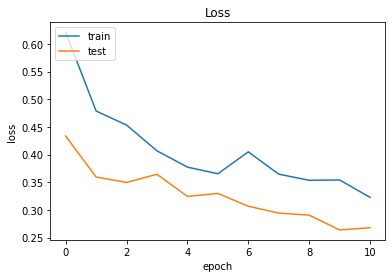

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
conv = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = conv.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptav05sk_/assets


In [ ]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  38048840 Aug 31 15:57 model.tflite
